In [228]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

import warnings
warnings.filterwarnings("ignore")

import matplotlib.image as mpimg
import pathlib

from sklearn.model_selection import train_test_split

In [238]:
def show_imgs(breed_path, num_imgs):
    img_path = "../images/Images/{}/".format(breed_path)
    images = os.listdir(img_path)[:num_imgs]
    plt.figure(figsize=(18,18))
    for i in range(num_imgs):
        #connect directory to selected breed path and image number
        img = mpimg.imread(img_path + images[i])
        plt.subplot(num_imgs/5+1, 5, i+1)
        plt.imshow(img)
        plt.axis('off')


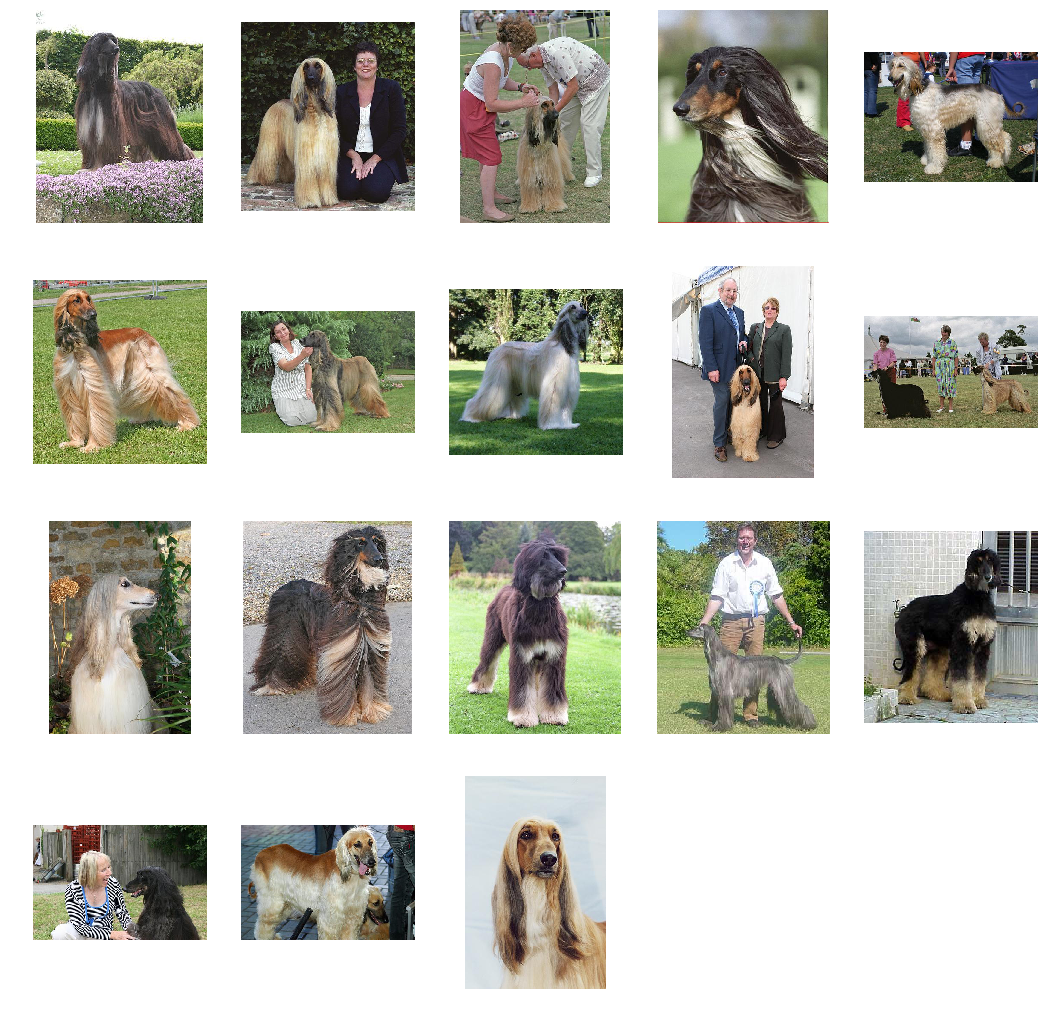

In [239]:
show_imgs('n02088094-Afghan_hound', 18)

In [115]:
annotation_dir = pathlib.Path('../annotations/Annotation/')
images_dir = pathlib.Path('../images/Images/')

In [121]:
breed_dir = [p for p in images_dir.iterdir()]
# When the path points to a directory, yield path objects of the directory contents:

In [175]:
breed_paths = [p.name for p in breed_dir]
breed_labels= ['-'.join(breed.split('-')[1:]) for breed in breed_names]
# breed_numbered = {i: code for i, code in enumerate(breed_code_dict)}
#created numbered labels for each breed

In [185]:
breed_paths[:5], breed_labels[:5]

(['n02097047-miniature_schnauzer',
  'n02105641-Old_English_sheepdog',
  'n02086240-Shih-Tzu',
  'n02099429-curly-coated_retriever',
  'n02096177-cairn'],
 ['miniature_schnauzer',
  'Old_English_sheepdog',
  'Shih-Tzu',
  'curly-coated_retriever',
  'cairn'])

In [197]:
#only first five breeds to start
X = []
y = []

imgs_paths = ["../images/Images/{}/".format(breed) for breed in breed_paths[:5]] 

for num, img_path in enumerate(imgs_paths):
    for imgname in os.listdir(img_path):
        X.append([img_path + imgname])
        y.append(breed_labels[num])

In [212]:
#prep labels and images before train test split
import random
random.seed(42)
# shuffle X and y before ttsplit
combined = list(zip(X, y))
random.shuffle(combined)

X, y = zip(*combined)

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [241]:
def show_img(breed_path):
    plt.figure(figsize=(18,18))
        #connect directory to selected breed path and image number
    img = mpimg.imread(breed_path)
    plt.imshow(img)
    plt.axis('off')


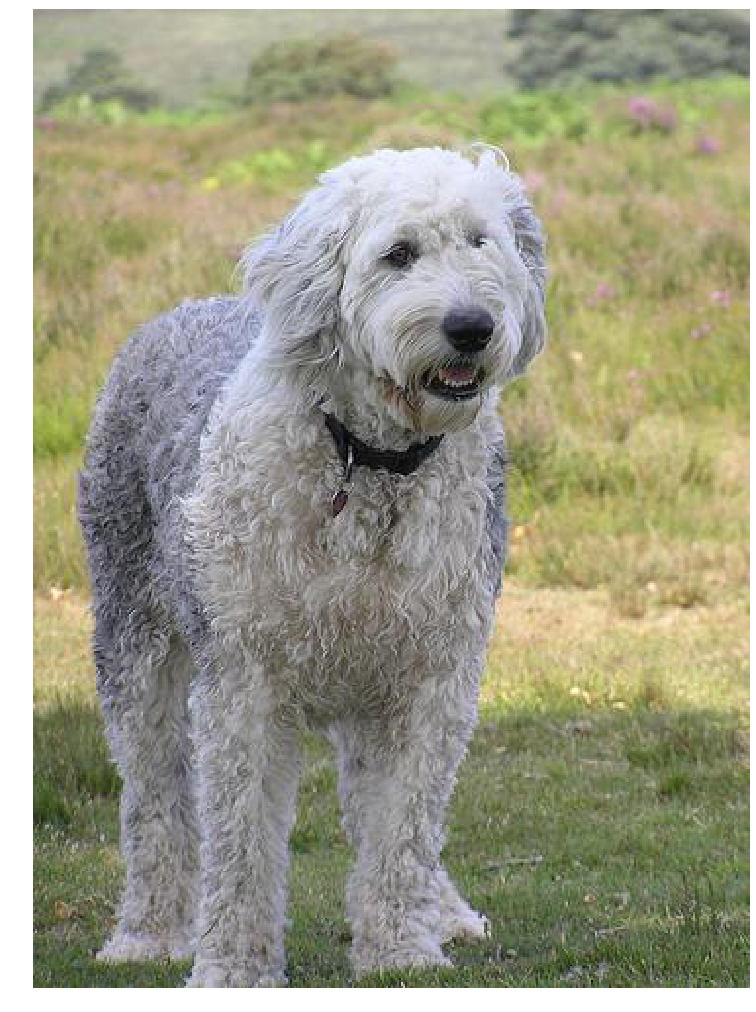

In [253]:
show_img(X_train[10][0])

In [262]:
# np.save('X_train.npy', X_train)
# np.save('y_train.npy', y_train)
# np.save('X_test.npy', X_test)
# np.save('y_test.npy', y_test)